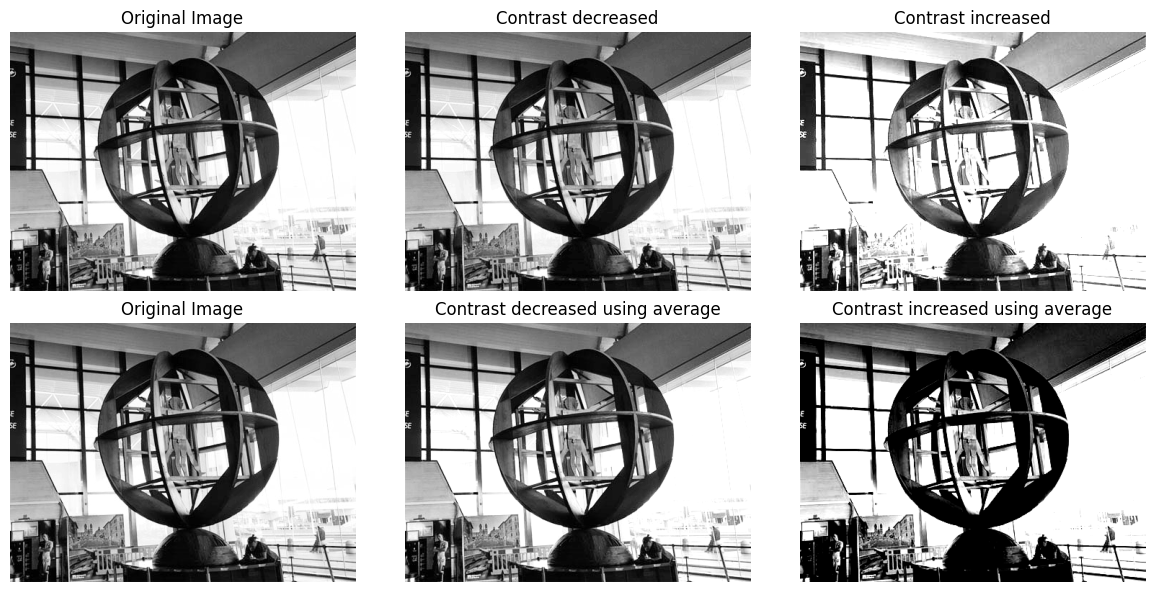

In [13]:
import cv2, numpy as np, matplotlib.pyplot as plt

# 이미지 읽기 (그레이스케일)
img = cv2.imread("img/contrast.jpg", cv2.IMREAD_GRAYSCALE)
# 더미 영상
img_dummy = np.zeros(img.shape[:2], img.dtype)
# 화소 평균 
avg_img = cv2.mean(img)[0]

# 대비 조정
dst1 = cv2.scaleAdd(img, 0.2, img_dummy) + 20  # 대비 감소 (오프셋 추가)
dst2 = cv2.scaleAdd(img, 2.0, img_dummy)       # 대비 증가
dst3 = cv2.addWeighted(img, 0.5, img_dummy, 0, avg_img)   # 명암대비 감소
dst4 = cv2.addWeighted(img, 2.0, img_dummy, 0, -avg_img)  # 명암대비 증가

# 리스트에 제목과 영상을 튜플로 저장
images = [
    ("Original Image", img),
    ("Contrast decreased", dst1),
    ("Contrast increased", dst2),
    ("Original Image", img),
    ("Contrast decreased using average", dst3),
    ("Contrast increased using average", dst4)
]

# 서브 플롯 정의
rows, cols = 2, 3
plt.figure(figsize=(cols*4, rows*3))

# 리스트에 저장된 이미지 출력
for i, (title, img) in enumerate(images, 1):
    plt.subplot(rows, cols, i)
    plt.title(title)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
pass

# 결과 출력
plt.tight_layout()
plt.show() 